<a href="https://colab.research.google.com/github/mushthofa-am/cnn-lenet5-demo/blob/master/lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lenet5-MNIST Demo

### Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense

Using TensorFlow backend.


### Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

len_train = len(X_train)
len_test = len(X_test)
print(f'jumlah train {len_train}, jumlah test {len_test}')

11493376/11490434 [==============================] - 0s 0us/step
jumlah train 60000, jumlah test 10000


### Show data sample

train label 4 
shape (28, 28) 
test label 1 
shape (28, 28)


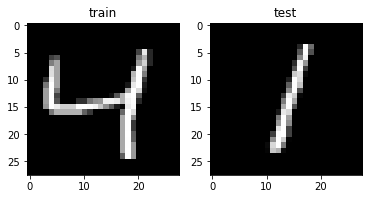

In [4]:
index = 2
label_train = f'train label {y_train[index]}'
shape_train = f'\nshape {X_train[index].shape}'
label_test = f'\ntest label {y_test[index]}'
shape_test = f'\nshape {X_test[index].shape}'

print(label_train, shape_train, label_test, shape_test)

plt.subplot(121), plt.imshow(X_train[index], 'gray'), plt.title('train')
plt.subplot(122), plt.imshow(X_test[index], 'gray'), plt.title('test')
plt.show()

### Resize

In [0]:
size = 32
X_train = [cv2.resize(img, (size, size)) for img in X_train]
X_test = [cv2.resize(img, (size, size)) for img in X_test]

train label 4 
shape (32, 32) 
test label 1 
shape (32, 32)


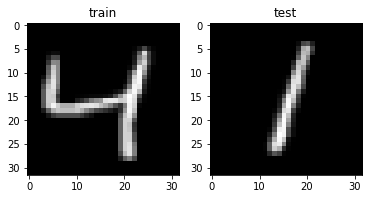

In [6]:
index = 2
label_train = f'train label {y_train[index]}'
shape_train = f'\nshape {X_train[index].shape}'
label_test = f'\ntest label {y_test[index]}'
shape_test = f'\nshape {X_test[index].shape}'

print(label_train, shape_train, label_test, shape_test)

plt.subplot(121), plt.imshow(X_train[index], 'gray'), plt.title('train')
plt.subplot(122), plt.imshow(X_test[index], 'gray'), plt.title('test')
plt.show()

### Preprocessing

In [7]:
# Image
# 1 = front, -1 = end
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

input_shape = X_train[0].shape

print(f'keras requirement, train {X_train.shape}, test {X_test.shape}')

print(f'single image {input_shape}')


keras requirement, train (60000, 32, 32, 1), test (10000, 32, 32, 1)
single image (32, 32, 1)


In [0]:
X_train = (X_train.astype('float32'))/255
X_test = (X_test.astype('float32'))/255

In [9]:
# Class / label
jml_class = 10
y_train = to_categorical(y_train, jml_class)
y_test = to_categorical(y_test, jml_class)

print(f'train {y_train[index]}, shape {y_train.shape}')
print(f'test {y_test[index]}, shape {y_test.shape}')

train [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape (60000, 10)
test [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape (10000, 10)


### Model

In [10]:
model_name = 'Lenet-5'
filter_numbers = [6, 16, 120, 84]

X_input = Input(shape=input_shape) # (32, 32, 1)

X = Conv2D(filter_numbers[0], (5, 5), strides=1, activation='relu')(X_input)
X = AveragePooling2D((2, 2), strides=2)(X)

X = Conv2D(filter_numbers[1], (5, 5), strides=1, activation='relu')(X)
X = AveragePooling2D((2, 2), strides=2)(X)

X = Flatten()(X)

X = Dense(filter_numbers[2], activation='relu')(X)

X = Dense(filter_numbers[3], activation='relu')(X)
X = Dense(jml_class, activation='softmax')(X)

model = Model(inputs=X_input, outputs=X, name=model_name)
model.summary()





Model: "Lenet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
histories = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 20,
    batch_size = 128,
    verbose = 1,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 16s 273us/step - loss: 0.3382 - acc: 0.9022 - val_loss: 0.1039 - val_acc: 0.9688
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0931 - acc: 0.9720 - val_loss: 0.0780 - val_acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0654 - acc: 0.9800 - val_loss: 0.0508 - val_acc: 0.9845
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0536 - acc: 0.9834 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0453 - acc: 0.9857 - val_loss: 0.0404 - val_acc: 0.9857
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0379 - acc: 0.9882 - val_loss: 0.0353 - val_acc: 0.9881
Epoch 7/20
60000/60000 [

### Results

Text(0, 0.5, 'acc')

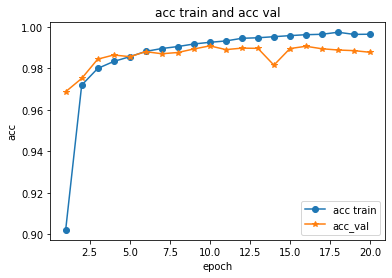

In [13]:
# Acc
f, ax = plt.subplots()
ax.plot([None] + histories.history['acc'], 'o-')
ax.plot([None] + histories.history['val_acc'], '*-')
ax.legend(['acc train', 'acc_val'], loc = 0)
ax.set_title('acc train and acc val')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'loss')

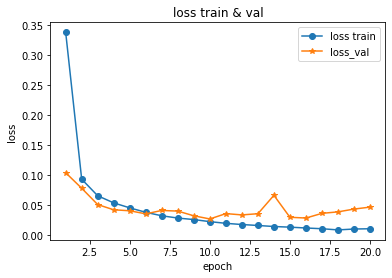

In [14]:
# Loss
f, ax = plt.subplots()
ax.plot([None] + histories.history['loss'], 'o-')
ax.plot([None] + histories.history['val_loss'], '*-')
ax.legend(['loss train', 'loss_val'])
ax.set_title('loss train & val')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

### Evaluate

In [15]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 1s 52us/step
Test loss 0.0465, accuracy 98.78%


### Save

In [0]:
path = "drive/My Drive/Colab Notebooks/model.h5"
model.save(path)

### Load

In [17]:
loaded_model = load_model(path)
loaded_model.summary()

Model: "Lenet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4812

### Predict

In [18]:
index_predict = 5
single_predict = np.expand_dims(X_test[index_predict], axis=0)
print(single_predict.shape)

predicted = loaded_model.predict(single_predict) # predict char
print(f'predicted {predicted}')
print(f'label {y_test[index_predict]}')

(1, 32, 32, 1)
predicted [[1.3952685e-07 9.9999297e-01 4.2065306e-08 2.5094141e-13 9.0726115e-07
  8.0216493e-12 1.8562329e-09 1.1530330e-07 5.8899309e-06 5.8808258e-10]]
label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
